In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from stoneforge import data_replacement as dtr
from stoneforge.datasets import dataload
from stoneforge.vis import wellplot

In [6]:
IK1,unik1 = dataload.ik1()

IK1_c = IK1[~IK1.isin([-999.0]).any(axis=1)]
IK1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,RHOB,DRHO,NPHI,DT
5050,2606.0,-49.0435,8.79390,8.61980,10.12370,58.4196,12.7783,2.2600,-0.2832,53.4228,93.7696
5051,2606.5,-50.4799,8.77080,8.59250,9.92250,59.8769,12.8500,2.2708,-0.3078,53.2102,93.4603
5052,2607.0,-52.1082,8.74770,8.53700,11.22560,61.2937,12.9218,2.2329,-0.3134,52.3063,92.4409
5053,2607.5,-51.1442,8.72480,8.48190,11.70970,63.3657,12.9935,2.2289,-0.2684,50.3678,92.9883
5054,2608.0,-47.5747,8.95780,8.42720,10.47900,65.9798,13.0652,2.2394,-0.1042,50.0560,93.7045
...,...,...,...,...,...,...,...,...,...,...,...
30506,15334.0,-11.3880,629.85712,1703.66248,1422.14807,16.8156,6.9289,2.6577,0.0468,-0.9550,54.3735
30507,15334.5,-5.4272,615.84058,1695.59717,1417.44800,16.3250,6.9282,2.6595,0.0582,-0.9549,47.2565
30508,15335.0,-7.8805,740.49573,1719.76306,1412.76270,15.7515,6.9275,2.6887,0.0742,-0.9566,41.9826
30509,15335.5,-9.9414,807.49799,1757.75037,1408.09375,15.6002,6.9268,2.6746,0.0637,-0.9584,38.9155


In [7]:
DP1,unik1 = dataload.dp1()

DP1_c = DP1[~DP1.isin([-999.0]).any(axis=1)]
DP1_c

,DEPT,SP,ILD,ILM,LL8,GR,CALI,DRHO,RHOB,NPHI,DT
5120,2660.0,-60.7408,3.3844,5.0310,5.1698,74.0426,12.9052,0.1493,2.4740,57.7686,117.7726
5121,2660.5,-56.1106,3.2822,4.8012,4.8838,76.9846,13.1302,0.1240,2.3211,57.8218,119.8360
5122,2661.0,-53.9129,3.4204,4.5819,4.6136,78.1111,13.1296,0.0844,2.2336,56.2045,122.1953
5123,2661.5,-51.8803,3.7083,4.3727,4.3964,79.2601,13.1396,0.0988,2.2560,55.8004,124.3410
5136,2668.0,-46.1159,4.3805,4.2128,4.4842,100.0704,14.4418,0.1167,2.2145,55.1738,121.9815
...,...,...,...,...,...,...,...,...,...,...,...
15626,7913.0,-25.3680,23.4500,27.6324,72.9849,101.1833,8.1639,0.0142,2.7215,15.5474,59.3189
15627,7913.5,-24.9876,22.3949,26.8287,70.6988,104.7405,8.1803,0.0106,2.7180,16.2522,58.8358
15628,7914.0,-24.5709,21.3872,26.1230,72.7765,108.2053,8.1815,0.0070,2.7112,16.5995,59.0097
15629,7914.5,-24.4368,20.4249,25.0137,79.3360,107.8603,8.1826,0.0034,2.7018,16.9890,59.7747


In [15]:
DT = list(IK1_c["DT"]) + list(DP1_c["DT"])

RHOB = list(IK1_c["RHOB"]) + list(DP1_c["RHOB"])
NPHI = list(IK1_c["NPHI"]) + list(DP1_c["NPHI"])

np.random.seed(42)

data_matrix = np.array([RHOB,NPHI,DT], float).T
np.random.shuffle(data_matrix)
data_matrix

array([[  2.4949,  25.2526,  79.639 ],
       [  2.2792,  42.2016,  88.9047],
       [  2.3355,  44.6031, 101.3839],
       ...,
       [  2.2528,  38.0976,  88.8023],
       [  2.1259,  47.1349, 124.792 ],
       [  2.3634,  21.6576,  70.7216]])

In [30]:
RHOB = data_matrix[:,0]
NPHI = data_matrix[:,1]
DT = data_matrix[:,2]

X = np.array([RHOB,NPHI]).T

# =================================================== #

ES1,unik1 = dataload.es1()
ES1_c = ES1[~ES1.isin([-999.0]).any(axis=1)]
X_test = np.array([ES1_c["RHOB"],ES1_c["NPHI"]],float).T
y_test = np.array(ES1_c["DT"])

linear_regression_simple


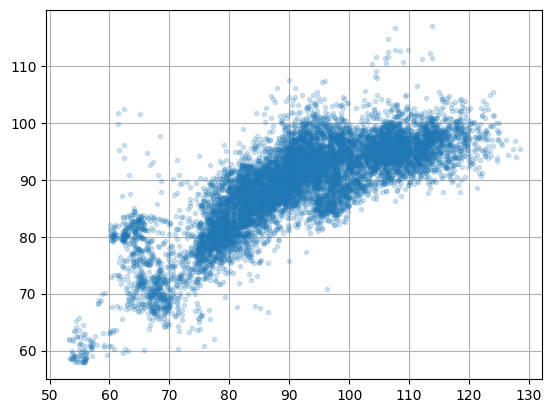

In [34]:
# linear regression:
dtr.settings(method = "linear_regression_simple", path = ".mlprj")
dtr.fit(X = X, y = DT, method = "linear_regression_simple", path = ".mlprj")
y_train = dtr.predict(X_test, method = "linear_regression_simple", path = ".mlprj")

plt.plot(y_test,y_train,'.',alpha = .2)
plt.grid()

linear_regression_polynomial


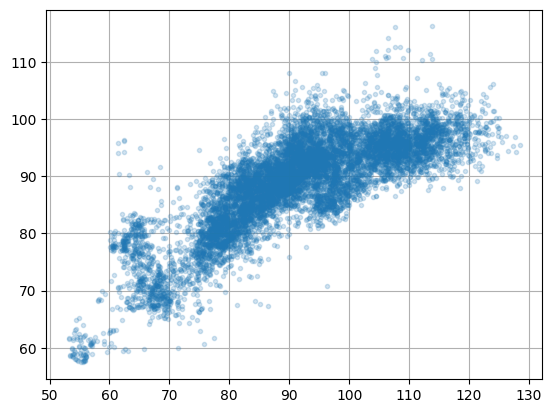

In [39]:
# "linear regression polynomial":
dtr.settings(method = "linear_regression_polynomial", degree = 2, path = ".mlprj")
dtr.fit(X = X, y = DT, method = "linear_regression_polynomial", path = ".mlprj")
y_train = dtr.predict(X_test, method = "linear_regression_polynomial", path = ".mlprj")

plt.plot(y_test,y_train,'.',alpha = .2)
plt.grid()

decision_tree_regression


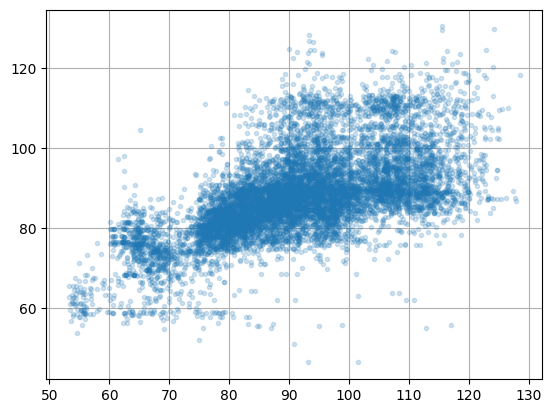

In [41]:
# "decision_tree_regression":
dtr.settings(method = "decision_tree_regression", path = ".mlprj")
dtr.fit(X = X, y = DT, method = "decision_tree_regression", path = ".mlprj")
y_train = dtr.predict(X_test, method = "decision_tree_regression", path = ".mlprj")

plt.plot(y_test,y_train,'.',alpha = .2)
plt.grid()

support_vector_regression


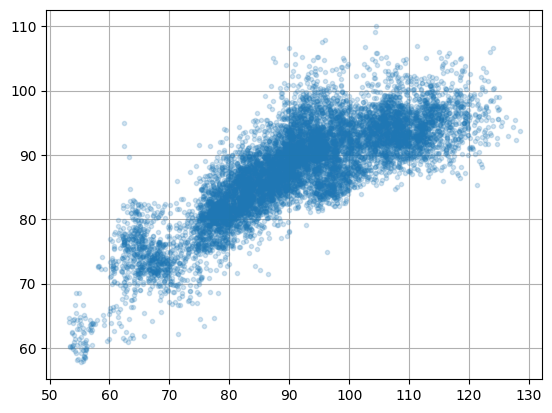

In [42]:
# "support_vector_regression":
dtr.settings(method = "support_vector_regression", path = ".mlprj")
dtr.fit(X = X, y = DT, method = "support_vector_regression", path = ".mlprj")
y_train = dtr.predict(X_test, method = "support_vector_regression", path = ".mlprj")

plt.plot(y_test,y_train,'.',alpha = .2)
plt.grid()

random_forest_regression


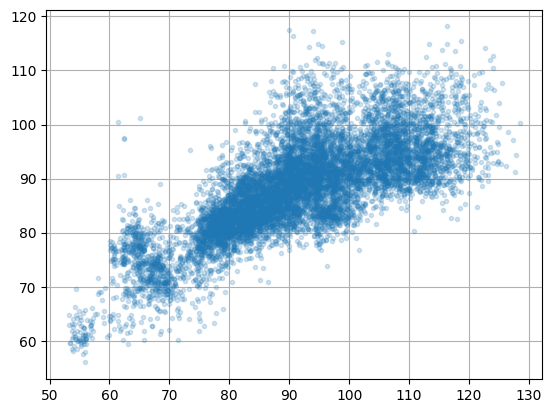

In [43]:
# "random_forest_regression":
dtr.settings(method = "random_forest_regression", path = ".mlprj")
dtr.fit(X = X, y = DT, method = "random_forest_regression", path = ".mlprj")
y_train = dtr.predict(X_test, method = "random_forest_regression", path = ".mlprj")

plt.plot(y_test,y_train,'.',alpha = .2)
plt.grid()

In [ ]:
from stoneforge.rock_physics import f